### WhatsApp Log Analysis By Krishnakanth Yachareni

In [93]:
################################## WhatsApp Log Analysis By Krishnakanth Yachareni #########################################

# Cleaning WhatsApp log 
import os
import re
import pandas as pd
import numpy as np

# Read file by providing file path.
watsup_file = 'C:/Users/Krishna/Desktop/notebook/whatsapp_data/class_group.txt'


# Read WhatsApp file
if os.path.exists(watsup_file):
        file_data = open(watsup_file,'r', encoding="utf8")
        watsup_content = file_data.read()

# Get date
date_regex=re.compile(r'(\d+/\d+/\d+)')
date=date_regex.findall(watsup_content)

# Get time
time_regex=re.compile(r'(\d{1,2}:\d{2} AM|PM)')
time=time_regex.findall(watsup_content)

# Get Users
user_regex=re.compile(r'-(.*?):')
user=user_regex.findall(watsup_content)

# Get Message
message_regex=re.compile(r'([^:]+):?$')
me_regex=re.compile(r"(\n)(?<=)(\d+/\d+/\d+)(.*)")
mess=me_regex.findall(watsup_content)
message = [''.join(message_regex.findall(''.join(msg))).strip() for msg in mess]

# Zip date,time,user,message together
data=[]
for w,x,y,z in zip(date,time,user,message):
    data.append([str(w),str(x),str(y),str(z)])
    
# Create DataFrame from WhatsApp content
df=pd.DataFrame(data,columns=("Date","Time","User","Message"))

# Let's clean our Message
df['Message']=df['Message'].str.replace('\'(.*?): ','')

# Get Year from Date
df['Date'] = pd.to_datetime(df['Date'])
df['Year']=df['Date'].dt.year

# Get Month from Date
df['Month']=df['Date'].dt.month

# Get Day from Date
df['Day']=df['Date'].dt.day

# Get Hours of the Day

# df['Time'] = pd.to_datetime(df['Time'])
#df['Hours']=df.Time.apply(lambda x: x.hour)

# Message words
df['Words'] = df['Message'].str.strip().str.split('[\W_]+')

# Word length
df['Word Length'] = df['Words'].apply(len)-2

# Get the Length of Message
df['Message Characters'] = df['Message'].map(str).apply(len)-3

# Get Media shared in the Message
df['Media']=df['Message'].str.contains('<Media omitted>')

# Save the DataFrame to a csv file
df.to_csv("whatsapp.csv")

In [94]:
print(df.head())

        Date      Time                User  \
0 2018-03-26  12:57 AM    Cse Aruna Kumari   
1 2018-03-29        PM   Fri Vishnu Prasad   
2 2018-03-29        PM     Fri Jhanaki Ram   
3 2018-03-29        PM   Fri Vishnu Prasad   
4 2018-03-29        PM     Fri Jhanaki Ram   

                                             Message  Year  Month  Day  \
0                                    <Media omitted>  2018      3   26   
1                                 thop chepinav mama  2018      3   29   
2             Evaroo chepar mama... Nak telvaduu...😌  2018      3   29   
3  avna...nen nv me company lo em ayna chepinava ...  2018      3   29   
4                                                🤣🤣🤣  2018      3   29   

                                               Words  Word Length  \
0                               [, Media, omitted, ]            2   
1                             [thop, chepinav, mama]            1   
2            [Evaroo, chepar, mama, Nak, telvaduu, ]            4   
3 

In [95]:
print(df.shape[0])

1929


In [96]:
print(df.describe())

         Year        Month          Day  Word Length  Message Characters
count  1929.0  1929.000000  1929.000000  1929.000000         1929.000000
mean   2018.0     5.586833    14.045101     3.081389           24.556765
std       0.0     2.406521     8.472101     4.465649           25.527871
min    2018.0     1.000000     4.000000    -1.000000           -2.000000
25%    2018.0     4.000000     5.000000     1.000000           12.000000
50%    2018.0     6.000000    13.000000     2.000000           19.000000
75%    2018.0     7.000000    20.000000     4.000000           30.000000
max    2018.0    12.000000    31.000000    81.000000          462.000000


In [97]:
print(df.columns)

Index(['Date', 'Time', 'User', 'Message', 'Year', 'Month', 'Day', 'Words',
       'Word Length', 'Message Characters', 'Media'],
      dtype='object')


### Summary by dates

In [98]:
days=df.groupby('Date')['Date'].count()
print(days)

Date
2018-01-04     28
2018-01-05     95
2018-01-06      1
2018-02-05     77
2018-02-06      1
2018-03-04      7
2018-03-05      2
2018-03-06      4
2018-03-07     53
2018-03-26      1
2018-03-29     10
2018-03-30      5
2018-03-31     36
2018-04-04      1
2018-04-05      1
2018-04-06      6
2018-04-07      2
2018-04-13     12
2018-04-14      4
2018-04-16      7
2018-04-17     76
2018-04-20     32
2018-04-21      1
2018-04-23     35
2018-04-24     49
2018-04-25     52
2018-04-26      4
2018-04-27      1
2018-04-28     61
2018-04-29      1
             ... 
2018-06-17      6
2018-06-18     59
2018-06-19      7
2018-06-20     72
2018-06-21      3
2018-06-26     37
2018-06-27      1
2018-06-28      1
2018-06-29     66
2018-06-30      8
2018-07-04      2
2018-07-07      3
2018-07-13    156
2018-07-14      2
2018-07-15     35
2018-07-16     13
2018-07-17      9
2018-07-18    105
2018-08-04      1
2018-08-05     76
2018-08-07     41
2018-09-04      3
2018-09-05     45
2018-10-04      2
2018-

### Summary By User 

In [101]:
users=df.groupby('User')['User'].count()
print(users)

User
 Abhinav Mississippi                                                                               47
 Cse Aruna Kumari                                                                                  27
 Cse Deepa                                                                                         43
 Cse Indhusha                                                                                       3
 Cse Kavitha Chitti Reddy                                                                           1
 Cse Kiranmai                                                                                      14
 Cse Komal                                                                                         31
 Cse Maheswari                                                                                     24
 Cse Manasa                                                                                        34
 Cse Meghana                                                                 

### Summary by message

In [102]:
message=df.groupby('User')['Message'].count()
print(message)

User
 Abhinav Mississippi                                                                               47
 Cse Aruna Kumari                                                                                  27
 Cse Deepa                                                                                         43
 Cse Indhusha                                                                                       3
 Cse Kavitha Chitti Reddy                                                                           1
 Cse Kiranmai                                                                                      14
 Cse Komal                                                                                         31
 Cse Maheswari                                                                                     24
 Cse Manasa                                                                                        34
 Cse Meghana                                                                 

### Summary by Year

In [104]:
year=df.groupby('Year')['Year'].count()
print(year)

Year
2018    1929
Name: Year, dtype: int64


### Summary by Month

In [105]:
month =df.groupby(['Month'])['Month'].count()
print(month)

Month
1     124
2      78
3     118
4     362
5     143
6     480
7     325
8     118
9      48
10     47
11     53
12     33
Name: Month, dtype: int64


### Summary by Month and Year

In [106]:
month=df.groupby(['Year','Month'])['Month'].count()
print(month)

Year  Month
2018  1        124
      2         78
      3        118
      4        362
      5        143
      6        480
      7        325
      8        118
      9         48
      10        47
      11        53
      12        33
Name: Month, dtype: int64


### Summary by Day

In [107]:
year_month=df.groupby(['Year','Day'])['Day'].count()
print(year_month)

Year  Day
2018  4      121
      5      384
      6      121
      7      177
      13     176
      14      66
      15      39
      16      21
      17     106
      18     165
      19       7
      20     147
      21       4
      23      36
      24      53
      25      55
      26      42
      27       3
      28      62
      29      78
      30      30
      31      36
Name: Day, dtype: int64


### Summary by hour

In [ ]:
date_hour=df.groupby(['Date','Hours'])['Hours'].count()
print(date_hour)

### Summary by Message character length

In [109]:
char_length=df.groupby(['User'])['Message Characters'].sum()
print(char_length)

User
 Abhinav Mississippi                                                                              1335
 Cse Aruna Kumari                                                                                  743
 Cse Deepa                                                                                         997
 Cse Indhusha                                                                                       62
 Cse Kavitha Chitti Reddy                                                                           15
 Cse Kiranmai                                                                                      252
 Cse Komal                                                                                         634
 Cse Maheswari                                                                                     488
 Cse Manasa                                                                                        800
 Cse Meghana                                                        

### Summary by Message word length and User

In [110]:
char_length=df.groupby(['User'])['Word Length'].sum()
print(char_length)

User
 Abhinav Mississippi                                                                              165
 Cse Aruna Kumari                                                                                  98
 Cse Deepa                                                                                        105
 Cse Indhusha                                                                                       5
 Cse Kavitha Chitti Reddy                                                                           1
 Cse Kiranmai                                                                                      25
 Cse Komal                                                                                         82
 Cse Maheswari                                                                                     54
 Cse Manasa                                                                                       105
 Cse Meghana                                                                 

### Summary by Media shared

In [111]:
media=df.groupby(['Media'])['Media'].sum()
print(media)

Media
False     0.0
True     64.0
Name: Media, dtype: float64


### Summary by Media shared per user

In [112]:
media_df=df[df['Media']==True]
media_per_user=media_df.groupby(['User','Media'])['Media'].count()
print(media_per_user)

User                                                                                            Media
 Abhinav Mississippi                                                                            True     2
 Cse Aruna Kumari                                                                               True     2
 Cse Deepa                                                                                      True     1
 Cse Manasa                                                                                     True     1
 Cse Mounika T                                                                                  True     1
 Cse Mounya                                                                                     True     1
 Cse Niharika                                                                                   True     2
 Cse Ravali                                                                                     True     2
 Cse Shailaja Cse                         

### Summary by Media shared per month

In [113]:
media_df=df[df['Media']==True]
media_per_month=media_df.groupby(['Year','Month','Media'])['Media'].count()
print(media_per_month)

Year  Month  Media
2018  1      True      2
      2      True      2
      3      True      8
      4      True      8
      5      True      6
      6      True      7
      7      True      3
      8      True      6
      9      True     11
      10     True      6
      11     True      2
      12     True      3
Name: Media, dtype: int64


## Data Visualization
### Distribution of Users with Message Count Bar Chart

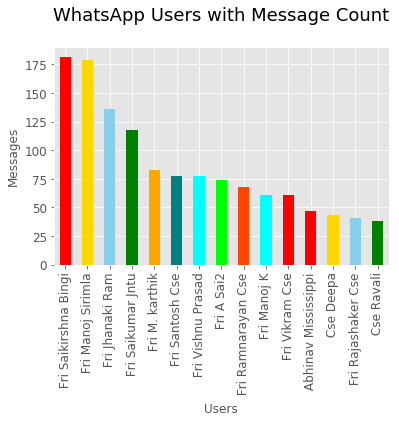

In [120]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
 
users=df.groupby('User')['User'].count().nlargest(15)
 
def bar_chart(users):
    ax = users.plot(kind='bar', color = ['red','gold','skyblue','green','orange','teal','cyan','lime','orangered','aqua'], fontsize=12)
    ax.set_title("WhatsApp Users with Message Count\n", fontsize=18)
    ax.set_xlabel("Users", fontsize=12)
    ax.set_ylabel("Messages", fontsize=12)
    plt.show()
    #plt.savefig('whatsapp.png')
 
bar_chart(users)

### Date and User chat Bar Chart

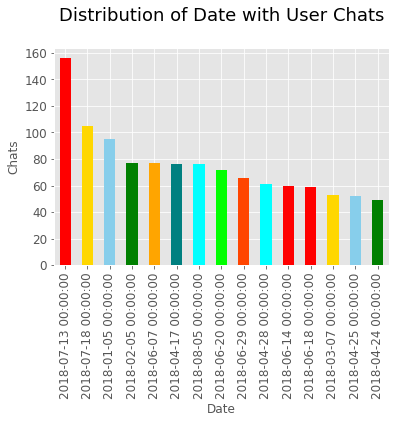

In [121]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

days=df.groupby('Date')['Date'].count().nlargest(15)
def date_users_bar_chart(date):
    ax = date.plot(kind='bar', color = ['red','gold','skyblue','green','orange','teal','cyan','lime','orangered','aqua'], fontsize=12)
    ax.set_title("Distribution of Date with User Chats\n", fontsize=18)
    ax.set_xlabel("Date", fontsize=12)
    ax.set_ylabel("Chats", fontsize=12)
    plt.show()

days_count=days[0:]
date_users_bar_chart(days_count)

### Date with User Chat Line Graph

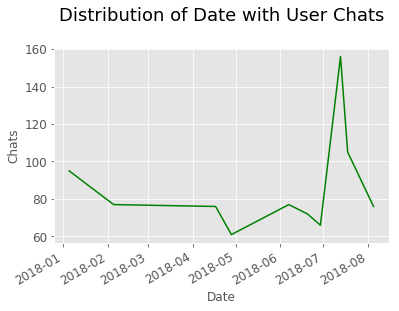

In [122]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

date=df.groupby('Date')['Date'].count().nlargest(10)
def user_line_chart(date):
    ax = date.plot(kind='line',color='green', fontsize=12)
    ax.set_title("Distribution of Date with User Chats\n", fontsize=18)
    ax.set_xlabel("Date", fontsize=12)
    ax.set_ylabel("Chats", fontsize=12)
    plt.show()

user_line_chart(date)

### User Chats Pie Chart

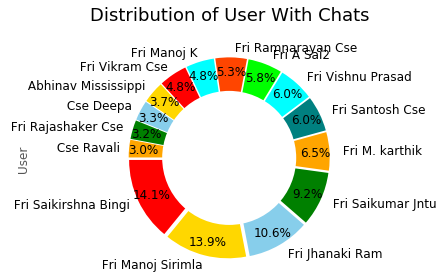

In [124]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

user=df.groupby('User')['User'].count().nlargest(15)

def user_chat_pie(user):
    fig, ax = plt.subplots()
    explodex = []
    for i in np.arange(len(user)):
        explodex.append(0.05)
    ax = user.plot(kind='pie', colors = ['red','gold','skyblue','green','orange','teal','cyan','lime','orangered','aqua'], fontsize=12, autopct='%1.1f%%', startangle=180, pctdistance=0.85, explode = explodex)
    inner_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(inner_circle)
    ax.axis('equal')  
    ax.set_title("Distribution of User With Chats\n", fontsize=18)
    plt.tight_layout()
    plt.show()
   #plt.savefig('pie.png',bbox_inches='tight')
user_chat_pie(user)

### Media Shared Pie Chart

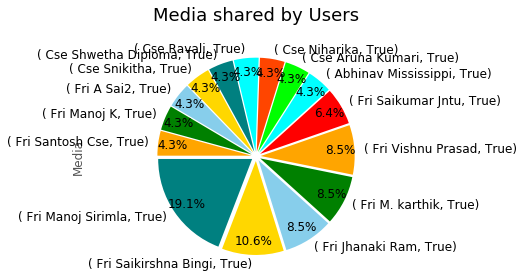

In [125]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

media_df=df[df['Media']==True]
media_per_user_group=media_df.groupby(['User','Media'])['Media'].count().nlargest(15)

def media_shared_pie(media_per_user_group):
    fig, ax = plt.subplots()
    explodex = []
    for i in np.arange(len(media_per_user_group)):
        explodex.append(0.05)
    ax = media_per_user_group.plot(kind='pie', colors = ['teal','gold','skyblue','green','orange','red','cyan','lime','orangered','aqua'], fontsize=12, autopct='%1.1f%%', startangle=180, pctdistance=0.85,explode=explodex)
    ax.axis('equal')  
    ax.set_title("Media shared by Users\n", fontsize=18)
    plt.show()

media_shared_pie(media_per_user_group)

### Messages Word Length Pie

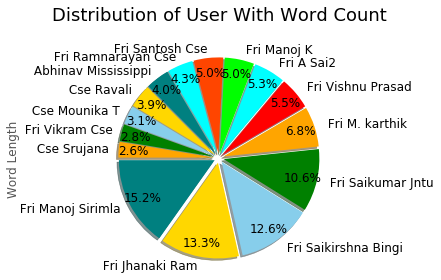

In [127]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

word_count=df.groupby(['User'])['Word Length'].sum().nlargest(15)

def pie_chart(word_count):
    fig, ax = plt.subplots()
    explodex = []
    for i in np.arange(len(word_count)):
        explodex.append(0.05)
    ax = word_count.plot(kind='pie', colors = ['teal','gold','skyblue','green','orange','red','cyan','lime','orangered','aqua'],shadow=True, fontsize=12, autopct='%1.1f%%', startangle=180, pctdistance=0.85, explode = explodex)
    ax.axis('equal')  
    ax.set_title("Distribution of User With Word Count\n", fontsize=18)
    plt.tight_layout()
    plt.show()

pie_chart(word_count)

### Active Hours Bar Chart

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

active_hour=df.groupby(['Date','Hours'])['Hours'].count().nlargest(10)

def active_hours_bar_chart(active_hour):
    ax = active_hour.plot(kind='bar', color = ['aqua','gold','skyblue','green','orange','red','cyan','lime','orangered','teal'], fontsize=12)
    ax.set_title("Active Hour\n", fontsize=18)
    ax.set_xlabel("Date", fontsize=12)
    ax.set_ylabel("Chats", fontsize=12)
    plt.show()

active_hours_bar_chart(active_hour)

### Active Month Bar Chart

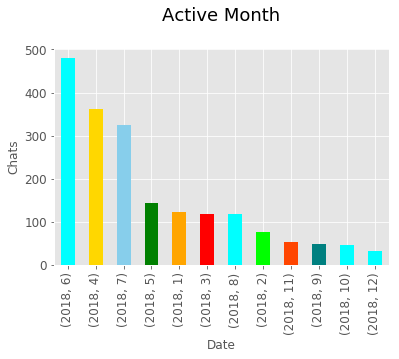

In [129]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

active_month=df.groupby(['Year','Month'])['Month'].count().nlargest(15)

def active_month_bar_chart(active_month):
    ax = active_month.plot(kind='bar', color = ['aqua','gold','skyblue','green','orange','red','cyan','lime','orangered','teal'], fontsize=12)
    ax.set_title("Active Month\n", fontsize=18)
    ax.set_xlabel("Date", fontsize=12)
    ax.set_ylabel("Chats", fontsize=12)
    plt.show()

active_month_bar_chart(active_month)

### Active Hours Line Chart



In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

active_hour_line_group=df.groupby(['Day','Hours'])['Hours'].count()
def active_hour_line_chart(active_hour_line_group):
    ax = active_hour_line_group.plot(kind='line',color='orange', fontsize=12)
    ax.set_title("Active Hour\n", fontsize=18)
    ax.set_xlabel("(Day,Hour)", fontsize=12)
    ax.set_ylabel("Chats", fontsize=12)
    plt.show()
active_hour_line_chart(active_hour_line_group)